### VWAP 

In [2]:
import pandas as pd
import os
from pathlib import Path
from typing import Union, List

def load_crypto_data(
    base_path: Union[str, Path],
    symbol: str = "BTCUSDT",
    year: str = "2024",
    freq: str = "1m"
) -> pd.DataFrame:
    """
    加載並合併特定交易對的所有每日CSV文件
    
    Args:
        base_path (str/Path): 數據文件的基礎路徑
        symbol (str): 交易對名稱，如 "BTCUSDT"
        year (str): 年份，如 "2022"
        freq (str): 頻率，如 "1m"
    
    Returns:
        pd.DataFrame: 合併後的DataFrame
    """
    # 確保base_path是Path對象
    base_path = Path(base_path)
    
    # 構建文件匹配模式
    pattern = f"{symbol}_{year}-*_{freq}.csv"
    
    # 獲取所有匹配的文件並排序
    csv_files = sorted(list(base_path.glob(pattern)))
    
    if not csv_files:
        raise ValueError(f"No files found matching pattern: {pattern}")
    
    # 讀取並合併所有CSV文件
    dfs = []
    for file in csv_files:
        try:
            df = pd.read_csv(file)
            dfs.append(df)
        except Exception as e:
            print(f"Error reading file {file}: {e}")
    
    # 合併所有DataFrame
    if not dfs:
        raise ValueError("No data was successfully loaded")
    
    merged_df = pd.concat(dfs, ignore_index=True)
    
    # 確保時間列正確格式化
    merged_df['open_time'] = pd.to_datetime(merged_df['open_time'])
    merged_df['close_time'] = pd.to_datetime(merged_df['close_time'])
    
    # 按時間排序
    merged_df = merged_df.sort_values('open_time').reset_index(drop=True)
    
    # 檢查並移除重複數據
    merged_df = merged_df.drop_duplicates(subset=['open_time'], keep='first')
    
    return merged_df

def check_data_quality(df: pd.DataFrame) -> dict:
    """
    檢查合併後數據的質量
    
    Args:
        df (pd.DataFrame): 待檢查的DataFrame
    
    Returns:
        dict: 包含各種數據質量指標的字典
    """
    quality_report = {
        'total_rows': len(df),
        'date_range': (df['open_time'].min(), df['open_time'].max()),
        'missing_values': df.isnull().sum().to_dict(),
        'duplicate_times': len(df) - len(df['open_time'].unique()),
    }
    
    # 檢查時間間隔
    time_diffs = df['open_time'].diff().value_counts()
    quality_report['time_intervals'] = time_diffs
    
    return quality_report

# 使用示例


In [3]:

# 假設數據路徑
data_path = "/Users/mouyasushi/Desktop/quantDevops/Backtest_Performance/Alpha-Research/kline/binance/BTCUSDT/1m"

# 加載數據
btc_data = load_crypto_data(
    base_path=data_path,
    symbol="BTCUSDT",
    year="2024",
    freq="1m"
)

# 檢查數據質量
quality_report = check_data_quality(btc_data)

# 輸出基本信息
print(f"Loaded data shape: {btc_data.shape}")
print(f"Date range: {quality_report['date_range']}")
print(f"Total rows: {quality_report['total_rows']}")

Loaded data shape: (488160, 12)
Date range: (Timestamp('2024-01-01 00:00:00'), Timestamp('2024-12-04 23:59:00'))
Total rows: 488160


In [4]:
btc_data = btc_data.set_index('open_time')

In [5]:
btc_data

,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
open_time,,,,,,,,,,,
2024-01-01 00:00:00,42314.0,42335.8,42289.6,42331.9,289.641,2024-01-01 00:00:59.999,1.225616e+07,3310,175.211,7.414460e+06,0
2024-01-01 00:01:00,42331.9,42353.1,42331.8,42350.4,202.444,2024-01-01 00:01:59.999,8.572241e+06,1885,154.353,6.535805e+06,0
2024-01-01 00:02:00,42350.4,42370.8,42349.6,42360.2,271.521,2024-01-01 00:02:59.999,1.150139e+07,2143,193.034,8.176843e+06,0
2024-01-01 00:03:00,42360.1,42405.8,42360.1,42405.8,392.238,2024-01-01 00:03:59.999,1.662644e+07,3551,332.749,1.410472e+07,0
2024-01-01 00:04:00,42405.7,42437.2,42405.7,42437.1,568.366,2024-01-01 00:04:59.999,2.411261e+07,4479,419.524,1.779786e+07,0
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-04 23:55:00,98803.5,98835.0,98775.7,98786.1,70.970,2024-12-04 23:55:59.999,7.012476e+06,1567,35.110,3.469313e+06,0
2024-12-04 23:56:00,98786.1,98792.9,98734.6,98770.7,151.892,2024-12-04 23:56:59.999,1.499998e+07,2414,51.604,5.096036e+06,0
2024-12-04 23:57:00,98770.7,98778.0,98740.1,98769.9,73.575,2024-12-04 23:57:59.999,7.265887e+06,1396,19.852,1.960477e+06,0


alpha 

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def calculate_vwap(df):
    """
    计算VWAP指标，每日重置，避免 look-ahead bias
    """
    df = df.copy()
    df['date'] = df.index.date
    df['minute'] = df.index.time
    
    # 使用当前周期的价格计算typical price
    df['typical_price'] = (df['high'].shift(1) + df['low'].shift(1) + df['close'].shift(1)) / 3
    
    # 确保volume也使用滞后数据
    df['volume_lag'] = df['volume'].shift(1)
    
    # 计算累积值时使用滞后数据
    df['cum_tp_vol'] = df.groupby('date').apply(
        lambda x: (x['typical_price'] * x['volume_lag']).cumsum()
    ).values
    
    df['cum_vol'] = df.groupby('date')['volume_lag'].cumsum()
    
    # 计算VWAP，确保不使用未来数据
    df['vwap'] = df['cum_tp_vol'] / df['cum_vol']
    
    return df



In [7]:
df = calculate_vwap(btc_data)

/var/folders/kz/g7fm_pz11tv5kbttdpy6thc40000gn/T/ipykernel_51088/2319135894.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df['cum_tp_vol'] = df.groupby('date').apply(


In [8]:
# Debug print
print("\nVWAP calculation check:")
print("VWAP range:", df['vwap'].describe())
print("Any NaN in VWAP:", df['vwap'].isna().any())




VWAP calculation check:
VWAP range: count    488159.000000
mean      63235.576165
std       11790.259387
min       39199.802667
25%       58290.643732
50%       63644.153568
75%       67937.486770
max       98917.433333
Name: vwap, dtype: float64
Any NaN in VWAP: True


In [9]:
def generate_signals(df):
    """
    生成交易信号，避免 look-ahead bias
    """
    df = df.copy()
    
    # 创建交易时间掩码
    trading_mask = df.groupby('date').apply(
        lambda x: pd.Series(x.index.time > pd.Timestamp('00:30:00').time(), index=x.index)
    ).reset_index(level=0, drop=True)
    
    # 使用滞后的收盘价与VWAP比较
    df['signal'] = 0
    df.loc[df['close'].shift(1) > df['vwap'].shift(1), 'signal'] = 1
    df.loc[df['close'].shift(1) < df['vwap'].shift(1), 'signal'] = -1
    
    # 计算信号变化
    df['trade_signal'] = df['signal'].diff()
    
    # 应用交易时间限制
    df.loc[~trading_mask, 'trade_signal'] = 0
    
    return df



In [10]:
df = generate_signals(df)
df

/var/folders/kz/g7fm_pz11tv5kbttdpy6thc40000gn/T/ipykernel_51088/100158581.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  trading_mask = df.groupby('date').apply(


,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,date,minute,typical_price,volume_lag,cum_tp_vol,cum_vol,vwap,signal,trade_signal
open_time,,,,,,,,,,,,,,,,,,,,
2024-01-01 00:00:00,42314.0,42335.8,42289.6,42331.9,289.641,2024-01-01 00:00:59.999,1.225616e+07,3310,175.211,7.414460e+06,0,2024-01-01,00:00:00,NaN,NaN,NaN,NaN,NaN,0,0.0
2024-01-01 00:01:00,42331.9,42353.1,42331.8,42350.4,202.444,2024-01-01 00:01:59.999,8.572241e+06,1885,154.353,6.535805e+06,0,2024-01-01,00:01:00,42319.100000,289.641,1.225735e+07,289.641,42319.100000,0,0.0
2024-01-01 00:02:00,42350.4,42370.8,42349.6,42360.2,271.521,2024-01-01 00:02:59.999,1.150139e+07,2143,193.034,8.176843e+06,0,2024-01-01,00:02:00,42345.100000,202.444,2.082986e+07,492.085,42329.796412,1,0.0
2024-01-01 00:03:00,42360.1,42405.8,42360.1,42405.8,392.238,2024-01-01 00:03:59.999,1.662644e+07,3551,332.749,1.410472e+07,0,2024-01-01,00:03:00,42360.200000,271.521,3.233154e+07,763.606,42340.607239,1,0.0
2024-01-01 00:04:00,42405.7,42437.2,42405.7,42437.1,568.366,2024-01-01 00:04:59.999,2.411261e+07,4479,419.524,1.779786e+07,0,2024-01-01,00:04:00,42390.566667,392.238,4.895873e+07,1155.844,42357.561072,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-04 23:55:00,98803.5,98835.0,98775.7,98786.1,70.970,2024-12-04 23:55:59.999,7.012476e+06,1567,35.110,3.469313e+06,0,2024-12-04,23:55:00,98799.666667,125.147,2.664497e+10,275401.996,96749.371057,1,0.0
2024-12-04 23:56:00,98786.1,98792.9,98734.6,98770.7,151.892,2024-12-04 23:56:59.999,1.499998e+07,2414,51.604,5.096036e+06,0,2024-12-04,23:56:00,98798.933333,70.970,2.665198e+10,275472.966,96749.899085,1,0.0
2024-12-04 23:57:00,98770.7,98778.0,98740.1,98769.9,73.575,2024-12-04 23:57:59.999,7.265887e+06,1396,19.852,1.960477e+06,0,2024-12-04,23:57:00,98766.066667,151.892,2.666698e+10,275624.858,96751.010159,1,0.0


In [11]:
print("\nSignal statistics:")
print("Signal value counts:", df['signal'].value_counts())
print("MACD signal value counts:", df['trade_signal'].value_counts())

# use .value_counts() to see the num 



Signal statistics:
Signal value counts: signal
 1    264577
-1    223581
 0         2
Name: count, dtype: int64
MACD signal value counts: trade_signal
 0.0    474972
 2.0      6607
-2.0      6581
Name: count, dtype: int64


In [12]:
def calculate_forward_returns(df, periods=[1]):
    """
    计算未来收益率，用于评估信号预测能力
    """
    returns = {}
    for period in periods:
        # 计算未来period个周期的收益率
        returns[f'forward_return_{period}'] = (
            df['close'].shift(-period) / df['close'] - 1
        )
    return pd.DataFrame(returns, index=df.index)



In [13]:
fr = calculate_forward_returns(df, periods = [1, 3, 5])

In [14]:
fr

,forward_return_1,forward_return_3,forward_return_5
open_time,,,
2024-01-01 00:00:00,0.000437,0.001746,0.002669
2024-01-01 00:01:00,0.000231,0.002047,0.002782
2024-01-01 00:02:00,0.001076,0.002000,0.002210
2024-01-01 00:03:00,0.000738,0.001471,0.001262
2024-01-01 00:04:00,0.000184,0.000394,0.000229
...,...,...,...
2024-12-04 23:55:00,-0.000156,-0.001172,NaN
2024-12-04 23:56:00,-0.000008,-0.001022,NaN
2024-12-04 23:57:00,-0.001008,NaN,NaN


In [15]:
def calculate_quintile_returns(df, signal_column='trade_signal', periods=[1]):
    """
    计算信号分位数分析，使用前瞻性收益率
    处理离散信号值的情况
    """
    df = df.copy()
    
    # 计算前瞻性收益率
    forward_returns = calculate_forward_returns(df, periods)
    df = pd.concat([df, forward_returns], axis=1)
    
    # 对信号进行滞后，确保在计算分位数时不使用未来信号
    signal_lag = df[signal_column].shift(1)
    
    # 检查唯一值的数量
    unique_values = signal_lag.unique()
    n_unique = len(unique_values)
    
    print(f"Unique signal values: {unique_values}")
    print(f"Number of unique values: {n_unique}")
    
    # 直接使用离散值作为分组
    df['signal_quintile'] = signal_lag
    
    # 为每个周期计算每个分位数的平均收益
    quintile_returns = {}
    
    # 使用实际的信号值作为标签
    quintile_labels = [f'{val:.1f}' for val in sorted(unique_values) if not np.isnan(val)]
    
    for period in periods:
        return_col = f'forward_return_{period}'
        # 计算每个信号值对应的平均前瞻性收益
        period_returns = df.groupby('signal_quintile')[return_col].mean()
        quintile_returns[period] = period_returns
    
    return quintile_returns, quintile_labels



In [24]:
quantile_returns, quantile_labels = calculate_quintile_returns(df, 'trade_signal', periods= [1, 5, 10, 20, 60])

Unique signal values: [nan  0.  2. -2.]
Number of unique values: 4


In [27]:
def plot_quintile_analysis(symbol, quintile_returns, quintile_labels, period=1):
    """
    绘制分析图表，适应离散信号值
    """
    plt.figure(figsize=(10, 6))
    returns_to_plot = quintile_returns[period]
    
    # 绘制条形图
    bars = plt.bar(range(len(returns_to_plot)), returns_to_plot * 1e5)
    
    # 添加数值标签
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom')
    
    plt.xticks(range(len(returns_to_plot)), quintile_labels, rotation=45)
    plt.title(f'{symbol} - Signal Returns Analysis (Period: {period})')
    plt.xlabel('Signal Value')
    plt.ylabel('Average Return (1e-5)')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    return plt



<module 'matplotlib.pyplot' from '/opt/homebrew/lib/python3.12/site-packages/matplotlib/pyplot.py'>

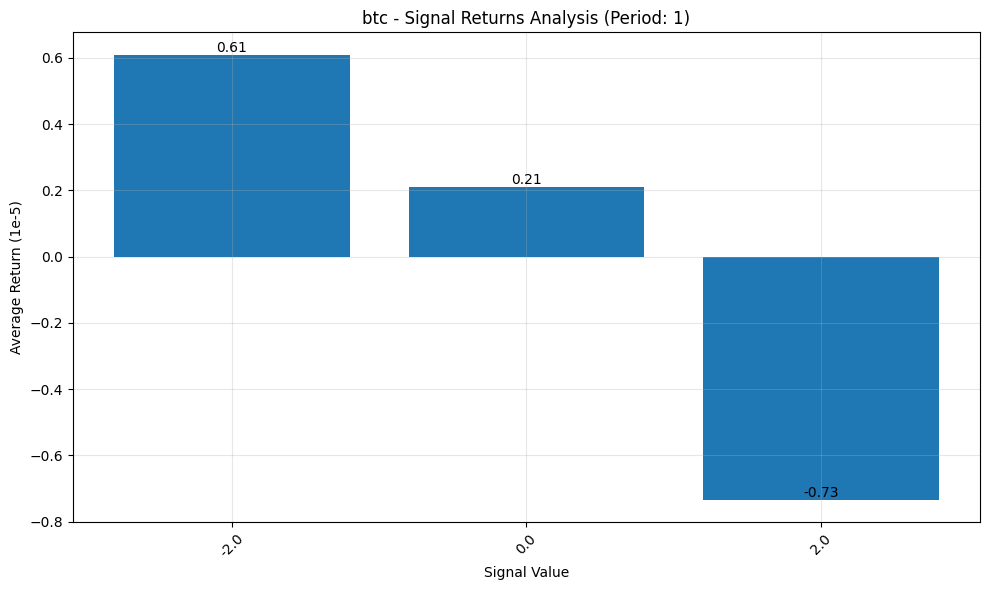

In [28]:
plot_quintile_analysis('btc', quantile_returns, quantile_labels, period = 1 )